# Predicting the Probability of a Fire Given a Zipcode

In [1]:
import pandas as pd
import numpy as np
import random as rd

In [2]:
import os
os.chdir("/Users/khashkhuuotgontulga/desktop")

In [3]:
df = pd.read_csv('ARC_incidents.csv', 
                 parse_dates = [ 'Date',
                                 'Verified', 
                                 'Responders.ID', 
                                 'On.Scene', 
                                 'Departed.Scene'
                                ]
                )

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [5]:
df

,Unnamed: 0,Date,Year,Month,Day,Workday,Number,IType,ICall,IStatus,Address,City,State,ZipCode,County,Lat,Long,Destroyed.Units,Damage.Major,Damage.Minor,Affected.Units,People.Injured,People.Hospitalized,People.Deceased,Adults,Children,Families,Assistance,Verified,Responders.ID,On.Scene,Departed.Scene
0,1,2014-01-01,2014,Jan,1,Wed,14-0533,fire,hot,closed,1348 W HOWARD ST,CHICAGO,IL,60626.0,Cook,42.019266,-87.665226,0.0,2.0,2.0,1.0,0.0,0.0,0.0,10.0,8.0,5.0,NaN,2014-01-01 07:00:00,2014-01-01 08:08:00,2014-01-01 09:08:00,2014-01-02 01:45:00
1,2,2014-01-01,2014,Jan,1,Wed,14-0536,fire,hot,closed,4323 SOUTH DEARBORN,CHICAGO,IL,60609.0,Cook,41.810123,-87.627154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,NaN,2014-01-01 21:10:00,2014-01-01 21:50:00,2014-01-01 22:59:00,2014-01-01 23:51:00
2,3,2014-01-01,2014,Jan,1,Wed,14-0535,fire,hot,closed,18405 REGAL ROAD,HOMEWOOD,IL,60430.0,Cook,41.555225,-87.653273,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,NaN,2014-01-01 16:05:00,2014-12-30 20:13:00,2014-01-01 17:30:00,2014-01-01 18:10:00
3,4,2014-01-01,2014,Jan,1,Wed,14-0534,police,hot,closed,604 SIBLEY AVE.,CALUMET CITY,IL,60409.0,Cook,41.622805,-87.534153,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,2014-01-01 14:25:00,2014-01-01 15:20:00,2014-01-01 16:00:00,2014-01-01 16:00:00
4,5,2014-01-02,2014,Jan,2,Thu,14-0537,fire,hot,closed,1457 WOODBURY CIR,GURNEE,IL,60031.0,Lake,42.379820,-87.982488,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2014-01-02 07:40:00,2014-01-02 08:10:00,2014-01-02 09:40:00,2014-01-02 22:15:00
5,6,2014-01-02,2014,Jan,2,Thu,14-0538,fire,NaN,closed,4002 S BRIGHTON PL,CHICAGO,IL,60632.0,Cook,41.820676,-87.692237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT
6,7,2014-01-02,2014,Jan,2,Thu,14-0541,fire,NaN,closed,7951 S DAMEN AVE,CHICAGO,IL,60620.0,Cook,41.748720,-87.672744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT
7,8,2014-01-02,2014,Jan,2,Thu,14-0539,fire,NaN,closed,1522 S WASHTENAW,CHICAGO,IL,60608.0,Cook,41.860358,-87.693252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT
8,9,2014-01-02,2014,Jan,2,Thu,14-0540,fire,hot,closed,131 S 9TH AVE,MAYWOOD,IL,60153.0,Cook,41.886806,-87.843754,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.0,1.0,NaN,2014-01-02 22:45:00,2014-01-02 23:38:00,2014-01-03 00:00:00,2014-01-03 01:41:00
9,10,2014-01-03,2014,Jan,3,Fri,14-0546,fire,NaN,closed,7961 KNOTTINGHAM CR,DARIEN,IL,60561.0,DuPage,41.743036,-87.985043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,4.0,NaN,NaT,NaT,NaT,NaT


### January 1, 2014 - May 25, 2018 (4 years and 5 months)

In [6]:
df.Date.min(), df.Date.max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2018-05-25 00:00:00'))

In [7]:
len(df.columns)

32

In [8]:
columns = ['Unnamed: 0','Year', 'Month', 'Day', 'Number',
           'Address', 'City', 'State', "County", 
           'Verified', 'Responders.ID', 'On.Scene', 'Departed.Scene']

In [9]:
df = df.drop(columns, axis = 1)

### Digitization

In [10]:
df.insert(3, 'Fire_or_Not', pd.factorize(df['IType'])[0] + 1)
df['Fire_or_Not'].max(), df['Fire_or_Not'].min()

(16, 1)

In [11]:
df.insert(6, 'ZipCodeNumber', pd.factorize(df['ZipCode'])[0] + 1)
df['ZipCodeNumber'].max(), df['ZipCodeNumber'].min()

(460, 0)

In [12]:
df["Workday"] = df["Workday"].map(dict(zip(("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"), (0, 1, 2, 3, 4, 5, 6))))
df["ICall"] = df["ICall"].map(dict(zip(("NaN","cold", "hot"), (0, 1, 2))))
df["IStatus"] = df["IStatus"].map(dict(zip(("invalid", "closed", "open"), (0, 1, 2))))

In [13]:
df = df.drop(['IType'], axis = 1)

### Fire = 1, Everything else = 0

In [14]:
df["Fire_or_Not"] = df.Fire_or_Not.replace(list(range(2,16+1)), 0)

In [15]:
df

,Date,Workday,Fire_or_Not,ICall,IStatus,ZipCodeNumber,ZipCode,Lat,Long,Destroyed.Units,Damage.Major,Damage.Minor,Affected.Units,People.Injured,People.Hospitalized,People.Deceased,Adults,Children,Families,Assistance
0,2014-01-01,2,1,2.0,1,1,60626.0,42.019266,-87.665226,0.0,2.0,2.0,1.0,0.0,0.0,0.0,10.0,8.0,5.0,NaN
1,2014-01-01,2,1,2.0,1,2,60609.0,41.810123,-87.627154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,NaN
2,2014-01-01,2,1,2.0,1,3,60430.0,41.555225,-87.653273,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,NaN
3,2014-01-01,2,0,2.0,1,4,60409.0,41.622805,-87.534153,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN
4,2014-01-02,3,1,2.0,1,5,60031.0,42.379820,-87.982488,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,2014-01-02,3,1,NaN,1,6,60632.0,41.820676,-87.692237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-01-02,3,1,NaN,1,7,60620.0,41.748720,-87.672744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-01-02,3,1,NaN,1,8,60608.0,41.860358,-87.693252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-01-02,3,1,2.0,1,9,60153.0,41.886806,-87.843754,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.0,1.0,NaN
9,2014-01-03,4,1,NaN,1,10,60561.0,41.743036,-87.985043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,4.0,NaN


In [16]:
from datetime import datetime as dt

In [17]:
# Convert the date into a number (of days since some point)
fromDate = min(df['Date'])
df['timedelta'] = (df['Date'] - fromDate).dt.days.astype(int)
print(df[['Date', 'timedelta']].head())
df.drop('Date', axis = 1, inplace = True)

        Date  timedelta
0 2014-01-01          0
1 2014-01-01          0
2 2014-01-01          0
3 2014-01-01          0
4 2014-01-02          1


In [18]:
df = df.fillna(0)
df

,Workday,Fire_or_Not,ICall,IStatus,ZipCodeNumber,ZipCode,Lat,Long,Destroyed.Units,Damage.Major,Damage.Minor,Affected.Units,People.Injured,People.Hospitalized,People.Deceased,Adults,Children,Families,Assistance,timedelta
0,2,1,2.0,1,1,60626.0,42.019266,-87.665226,0.0,2.0,2.0,1.0,0.0,0.0,0.0,10.0,8.0,5.0,0.0,0
1,2,1,2.0,1,2,60609.0,41.810123,-87.627154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0
2,2,1,2.0,1,3,60430.0,41.555225,-87.653273,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0
3,2,0,2.0,1,4,60409.0,41.622805,-87.534153,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,3,1,2.0,1,5,60031.0,42.379820,-87.982488,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,3,1,0.0,1,6,60632.0,41.820676,-87.692237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,3,1,0.0,1,7,60620.0,41.748720,-87.672744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,3,1,0.0,1,8,60608.0,41.860358,-87.693252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,3,1,2.0,1,9,60153.0,41.886806,-87.843754,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.0,1.0,0.0,1
9,4,1,0.0,1,10,60561.0,41.743036,-87.985043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,4.0,0.0,2


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df2 = df.loc[:, df.columns != 'Fire_or_Not']
df2

,Workday,ICall,IStatus,ZipCodeNumber,ZipCode,Lat,Long,Destroyed.Units,Damage.Major,Damage.Minor,Affected.Units,People.Injured,People.Hospitalized,People.Deceased,Adults,Children,Families,Assistance,timedelta
0,2,2.0,1,1,60626.0,42.019266,-87.665226,0.0,2.0,2.0,1.0,0.0,0.0,0.0,10.0,8.0,5.0,0.0,0
1,2,2.0,1,2,60609.0,41.810123,-87.627154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0
2,2,2.0,1,3,60430.0,41.555225,-87.653273,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0
3,2,2.0,1,4,60409.0,41.622805,-87.534153,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,3,2.0,1,5,60031.0,42.379820,-87.982488,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,3,0.0,1,6,60632.0,41.820676,-87.692237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,3,0.0,1,7,60620.0,41.748720,-87.672744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,3,0.0,1,8,60608.0,41.860358,-87.693252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,3,2.0,1,9,60153.0,41.886806,-87.843754,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.0,1.0,0.0,1
9,4,0.0,1,10,60561.0,41.743036,-87.985043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,4.0,0.0,2


### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

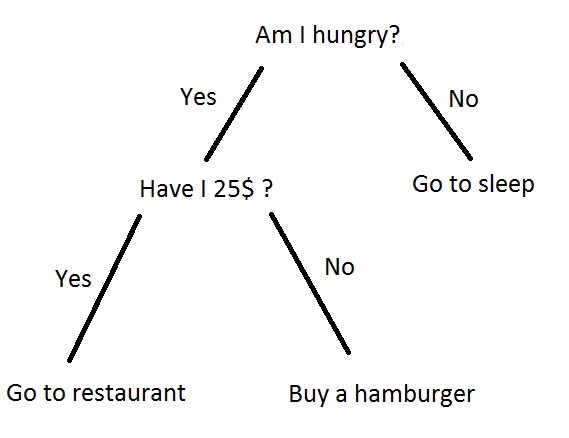

In [22]:
from IPython.core.display import Image
Image(filename =("/Users/khashkhuuotgontulga/pictures/DT.jpg"))

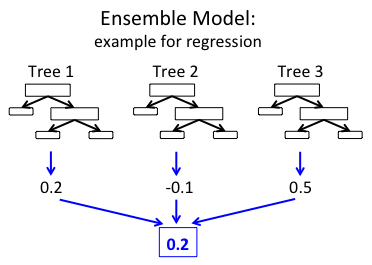

In [23]:
from IPython.core.display import Image
Image(filename =("/Users/khashkhuuotgontulga/pictures/ET.png"))

In [24]:
predictors = list(df2.columns.values)
predictors

['Workday',
 'ICall',
 'IStatus',
 'ZipCodeNumber',
 'ZipCode',
 'Lat',
 'Long',
 'Destroyed.Units',
 'Damage.Major',
 'Damage.Minor',
 'Affected.Units',
 'People.Injured',
 'People.Hospitalized',
 'People.Deceased',
 'Adults',
 'Children',
 'Families',
 'Assistance',
 'timedelta']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df["Fire_or_Not"])

In [207]:
forest = RandomForestClassifier(random_state = 50)

In [208]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=50,
            verbose=0, warm_start=False)

In [209]:
predictions = forest.predict(X_test)

In [210]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [211]:
print ("Train Accuracy :: ", accuracy_score(y_train, forest.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  0.9986876640419947
Test Accuracy  ::  0.9698261725155789


In [212]:
print(forest.classes_)
print(forest.n_classes_)
print(forest.n_features_)
print(forest.feature_importances_)

[0 1]
2
19
[0.00410146 0.18910118 0.29812247 0.00834831 0.01428455 0.01166067
 0.01902315 0.00928918 0.0827063  0.01724931 0.00834129 0.00040463
 0.0005116  0.00044998 0.0907446  0.00480577 0.09530111 0.133977
 0.01157743]


### 2, 3, 13, 15 columns are the most important to predict whether it was a fire or not

In [213]:
cm = confusion_matrix(y_test, predictions)

In [214]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

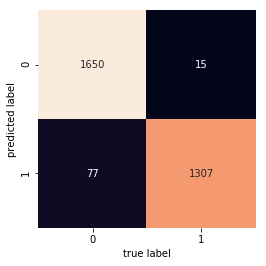

In [215]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Probability of a fire in a given zipcode

In [216]:
probabilities = forest.predict_proba(X_test)

### Probability of a fire

In [217]:
probabilities

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [218]:
Fire_Proba = [p[1] for p in probabilities]

In [219]:
Fire_Proba

[1.0,
 0.0,
 0.0,
 0.9,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.9,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 1.0,
 0.6,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.8,
 0.9,
 0.0,
 1.0,
 0.8,
 1.0,
 0.0,
 0.9,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.8,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.9,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.8,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.9,
 1.0,
 0.0,
 0.0,
 1.0,
 0.9,
 0.0,
 1.0,
 0.9,
 0.9,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.9,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.9,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.9,
 0.0,
 0.9,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.9,
 0.0,
 1.0,
 0.0,
 1.0,
 0.9,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 1.0,
 0.0,
 0.9,
 0.9,
 1.0,
 0.9,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.1

In [220]:
X_test["Fire_Proba"] = Fire_Proba

In [221]:
X_test

,Workday,ICall,IStatus,ZipCodeNumber,ZipCode,Lat,Long,Destroyed.Units,Damage.Major,Damage.Minor,Affected.Units,People.Injured,People.Hospitalized,People.Deceased,Adults,Children,Families,Assistance,timedelta,Fire_Proba
6818,0,1.0,1,116,60099.0,42.440627,-87.831358,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,780.0,936,1.0
4518,6,0.0,0,2,60609.0,41.804251,-87.671805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,655,0.0
6020,6,0.0,0,119,60014.0,42.235638,-88.290814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,844,0.0
5909,1,2.0,1,94,60659.0,41.997320,-87.698897,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,1.0,1185.0,832,0.9
11227,1,0.0,0,31,60901.0,41.132194,-87.861121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1483,0.0
8588,4,0.0,0,380,61071.0,41.754490,-89.659608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1164,0.0
9966,3,0.0,0,336,60540.0,41.766616,-88.163891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1331,0.0
11984,6,0.0,0,144,60085.0,42.377544,-87.865323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1579,0.0
10039,6,2.0,1,42,60624.0,41.873253,-87.726652,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1341,1.0
7140,3,0.0,0,7,60620.0,41.742816,-87.646059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,981,0.0


# Demo

In [222]:
from IPython.display import YouTubeVideo

In [223]:
import math

In [230]:
zipcode = input("What is your zipcode? ")
percent = X_test[X_test["ZipCode"] == int(zipcode)]["Fire_Proba"].mean()
print("%d%%" % (round(percent*100, 2)))

age = input("What is your age? ")
if (int(age) > 50):
    percent += 0.05
print("%d%%" % (round(percent*100, 2)))

fire_alarm = input("Do you have a smoke alarm installed? ")
if (fire_alarm.upper() == "NO"):
    percent += 0.05
print("%d%%" % (round(percent*100, 2)))

smokers = input("Are there smokers in your home? ")
if (smokers.upper() == "YES"):
    percent += 0.05
print("%d%%" % (round(percent*100, 2)))

elec = input("Have you had an electrical inspection in less than 10 years? ")
if (elec.upper() == "NO"):
    percent += 0.05
print("%d%%" % (round(percent*100, 2)))

heater = input("Do you have a space heater in your home? ")
if (heater.upper() == "YES"):
    percent += 0.05
print("%d%%" % (round(percent*100, 2)))

gas = input("Do you have a gas stove in your home? ")
if (gas.upper() == "YES"):
    percent += 0.05
print("%d%%" % (round(percent*100, 2)))

extinguisher = input("Do you have a fire extinguisher near your home? ")
if (extinguisher.upper() == "NO"):
    percent -= 0.10
print("%d%%" % (round(percent*100, 2)))

print("")

low = int((percent*100) / 10) * 10
if (low > 100):
    low = 90
    high = low
else:
    high = low+10
print("You have a %d-%d%% potential risk of a fire." % (low, high))

Please enter in your zipcode: 60628
59%
Please enter your age: 55
64%
Do you have a smoke alarm installed? yes
64%
Are there smokers in your home? yes
69%
Have you had an electrical inspection in less than 10 years? no
74%
Do you have a space heater in your home? no
74%
Do you have a gas stove in your home? no
74%
Do you have a fire extinguisher near your home? yes
74%

You have a 70-80% potential risk of a fire.


## Recommended Resource

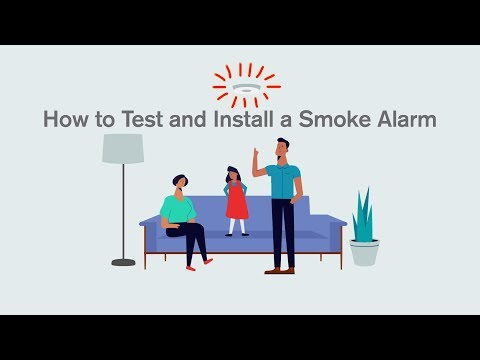

In [46]:
YouTubeVideo('zi1G291Fohc')

## ZipCodes

- Englewood: 60621
- Roseland: 60628
- Garfield Park: 60612
- Skokie: 60077
- IIT Zipcode: 60616
- Glenview: 60026